In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv(r'C:\Users\ashwi\Downloads\Online Retail.csv', encoding='ISO-8859-1')

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()
#df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [54]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [55]:
df=df.dropna(subset=['CustomerID'])
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [57]:
#date extraction
df['Month']=df['InvoiceDate'].dt.month
df['Year']=df['InvoiceDate'].dt.year
df['Quarter']=df['InvoiceDate'].dt.quarter
df['DayOfWeek']=df['InvoiceDate'].dt.dayofweek
df['Hour']=df['InvoiceDate'].dt.hour

In [58]:
# Define the reference date as one day after the latest transaction date
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate RFM metrics at the customer level
rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),  # Days since last purchase
    Frequency=('InvoiceNo', 'nunique'),  # Count of unique purchases
    Monetary=('TotalPrice', 'sum')  # Total spending
).reset_index()

In [59]:
# Rename RFM columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [60]:
# Selecting relevant features for clustering
features = rfm[['Recency', 'Frequency', 'Monetary']]

C:\Users\ashwi\AppData\Local\Temp\ipykernel_28104\2014259488.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Month', y='TotalPrice', palette='viridis')


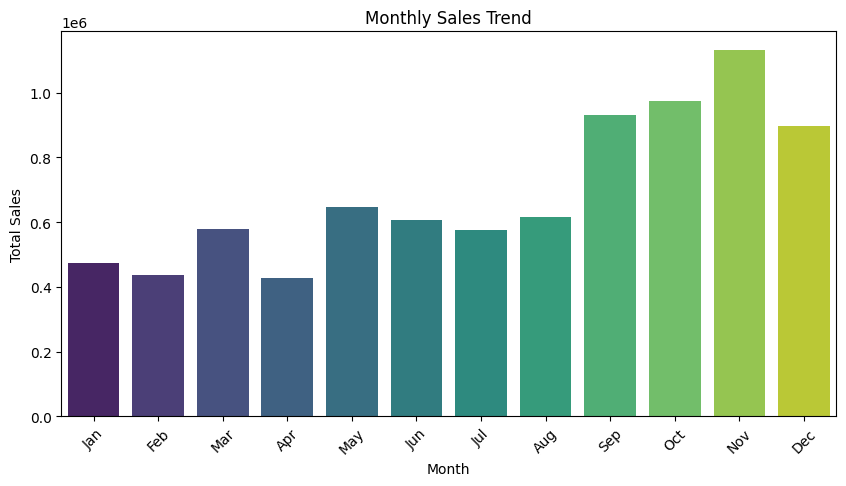

C:\Users\ashwi\AppData\Local\Temp\ipykernel_28104\2014259488.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='Quarter', y='TotalPrice', palette='viridis')


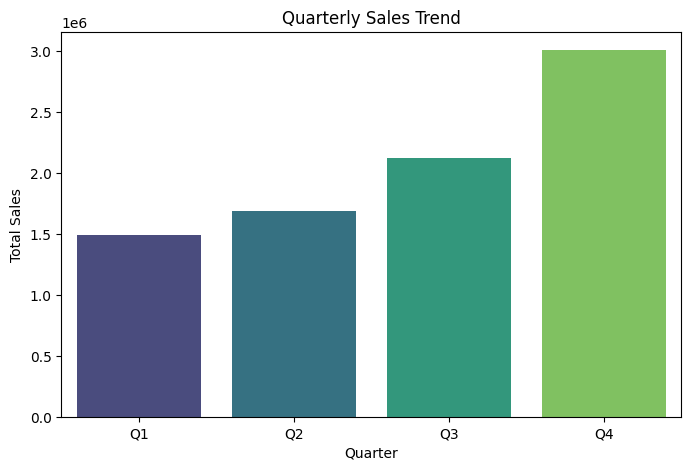

C:\Users\ashwi\AppData\Local\Temp\ipykernel_28104\2014259488.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='Year', y='TotalPrice', palette='viridis')


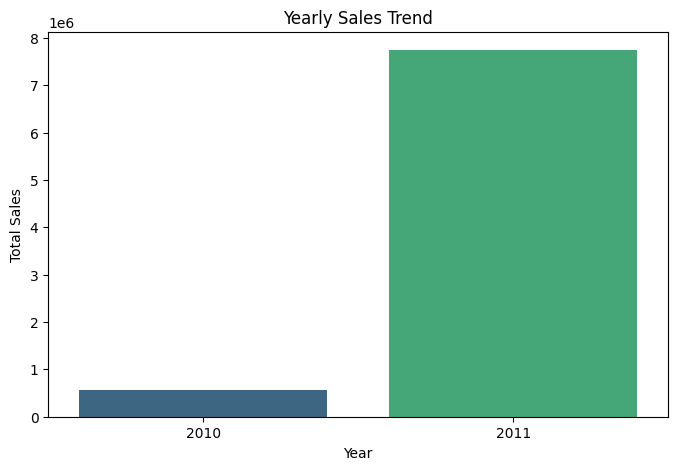

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales
monthly_sales = df.groupby('Month', as_index=False)['TotalPrice'].sum()
quarterly_sales = df.groupby('Quarter', as_index=False)['TotalPrice'].sum()
yearly_sales = df.groupby('Year', as_index=False)['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_sales, x='Month', y='TotalPrice', palette='viridis')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=quarterly_sales, x='Quarter', y='TotalPrice', palette='viridis')
plt.xticks(range(4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_sales, x='Year', y='TotalPrice', palette='viridis')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_28104\3668926088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_of_week_sales, x='DayOfWeek', y='TotalPrice', palette='viridis')


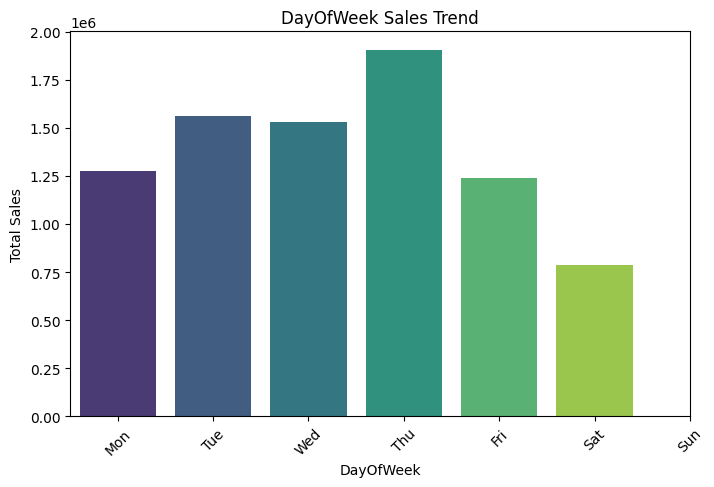

C:\Users\ashwi\AppData\Local\Temp\ipykernel_28104\3668926088.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales, x='Hour', y='TotalPrice', palette='viridis')


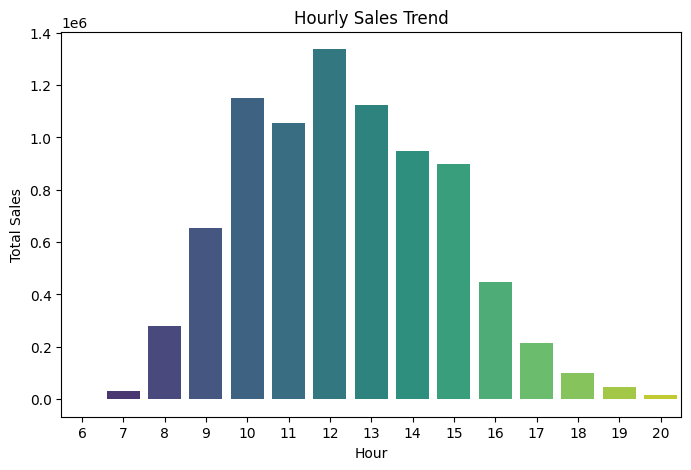

In [62]:
day_of_week_sales = df.groupby('DayOfWeek', as_index=False)['TotalPrice'].sum()
hourly_sales = df.groupby('Hour', as_index=False)['TotalPrice'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(data=day_of_week_sales, x='DayOfWeek', y='TotalPrice', palette='viridis')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.title('DayOfWeek Sales Trend')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=hourly_sales, x='Hour', y='TotalPrice', palette='viridis')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.show()

In [64]:
# Normalize features
scaler= StandardScaler()
scaled_features=scaler.fit_transform(features)

In [65]:
# K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

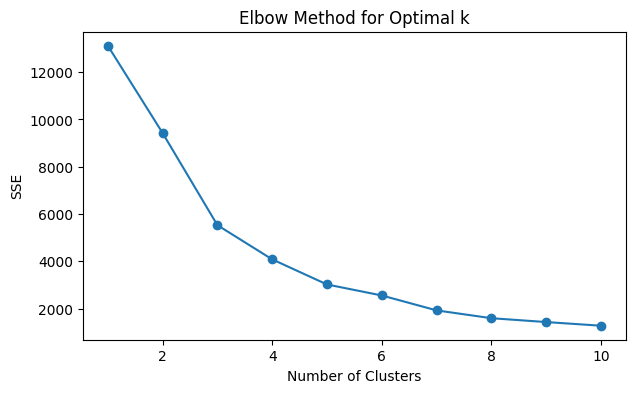

In [66]:
# Plot the SSE to visualize the Elbow
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [67]:
# Choose the optimal number of clusters based on the Elbow plot
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows to verify the cluster assignments
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']].head())

   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          2      0.00        1
1     12347.0        2          7   4310.00        0
2     12348.0       75          4   1797.24        0
3     12349.0       19          1   1757.55        0
4     12350.0      310          1    334.40        1


In [72]:
# Display Cluster Centroids and disply Output
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['Recency', 'Frequency', 'Monetary'])
centroids_df.index = [f'Cluster {i}' for i in range(len(centroids))]

print("K-Means Cluster Centroids:")
print(centroids_df)

K-Means Cluster Centroids:
            Recency  Frequency  Monetary
Cluster 0 -0.514395   0.055487 -0.009428
Cluster 1  1.535311  -0.346676 -0.175377
Cluster 2 -0.853169   8.759567  9.726631


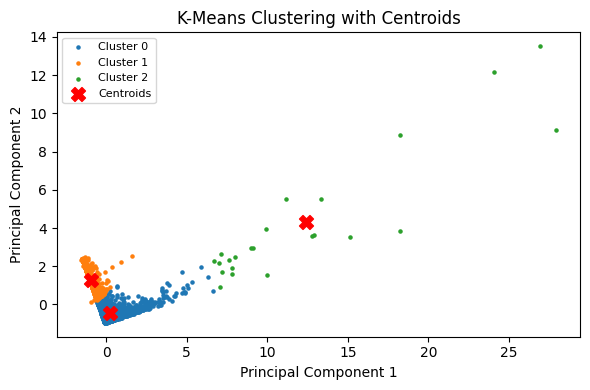

In [74]:
# Visualize Clusters using 2D PCA Plot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
reduced_centroids = pca.transform(centroids)

# Adjusted figure size and scatter point size
plt.figure(figsize=(6, 4))  # Smaller figure size for better legibility
for i in range(optimal_k):
    cluster_points = reduced_features[rfm['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, label=f'Cluster {i}')  # Smaller points for clusters

plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], s=100, c='red', marker='X', label='Centroids')  # Reduced size for centroids
plt.xlabel('Principal Component 1', fontsize=10)
plt.ylabel('Principal Component 2', fontsize=10)
plt.title('K-Means Clustering with Centroids', fontsize=12)
plt.legend(fontsize=8)
plt.tight_layout()  # Automatically adjust spacing for better visualization
plt.show()

In [73]:
# Calculate IQR for each feature
Q1 = rfm[['Recency', 'Frequency', 'Monetary']].quantile(0.25)
Q3 = rfm[['Recency', 'Frequency', 'Monetary']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
potential_outliers = rfm[
    (rfm['Recency'] < lower_bound['Recency']) | (rfm['Recency'] > upper_bound['Recency']) |
    (rfm['Frequency'] < lower_bound['Frequency']) | (rfm['Frequency'] > upper_bound['Frequency']) |
    (rfm['Monetary'] < lower_bound['Monetary']) | (rfm['Monetary'] > upper_bound['Monetary'])
]

print(f"Number of potential outliers: {potential_outliers.shape[0]}")
print(potential_outliers.head())

Number of potential outliers: 692
    CustomerID  Recency  Frequency  Monetary  Cluster
1      12347.0        2          7   4310.00        0
10     12357.0       33          1   6207.67        0
12     12359.0        8          6   6245.53        0
15     12362.0        3         13   5154.58        0
27     12378.0      130          1   4008.62        0


In [75]:
# Remove outliers
rfm_cleaned = rfm.drop(index=potential_outliers.index)
scaled_features_cleaned = scaled_features[np.isin(rfm.index, rfm_cleaned.index)]

print(f"RFM cleaned size: {rfm_cleaned.shape}")

RFM cleaned size: (3680, 5)


In [77]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_features_no_outliers = scaler.fit_transform(rfm_cleaned[['Recency', 'Frequency', 'Monetary']])
print("Scaled features after outlier removal:")
print(scaled_features_no_outliers[:5])

Scaled features after outlier removal:
[[ 2.19472617  0.         -0.65851727]
 [ 0.15821501  0.66666667  1.41164816]
 [-0.29614604 -0.33333333  1.36593092]
 [ 2.06490872 -0.33333333 -0.27333593]
 [-0.15821501  3.          1.12157574]]


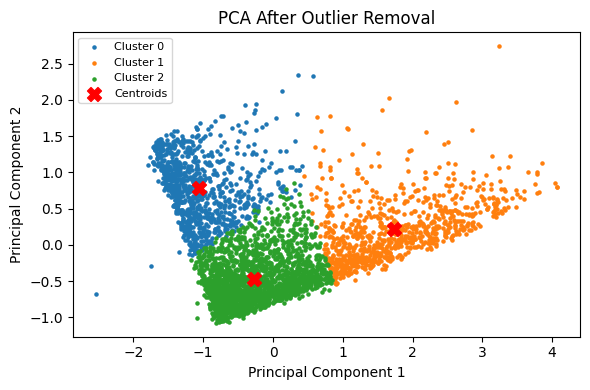

In [78]:
# Re-run PCA
pca = PCA(n_components=2)
reduced_features_no_outliers = pca.fit_transform(scaled_features_no_outliers)

# Run KMeans again
optimal_k = 3  # Replace with your determined optimal value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_cleaned['Cluster'] = kmeans.fit_predict(scaled_features_no_outliers)

reduced_centroids = pca.transform(kmeans.cluster_centers_)

# Adjusted figure size and scatter point size
plt.figure(figsize=(6, 4))  # Smaller figure size for better legibility
for i in range(optimal_k):
    cluster_points = reduced_features_no_outliers[rfm_cleaned['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, label=f'Cluster {i}')  # Smaller points for clusters

plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], s=100, c='red', marker='X', label='Centroids')  # Reduced size for centroids
plt.xlabel('Principal Component 1', fontsize=10)
plt.ylabel('Principal Component 2', fontsize=10)
plt.title('PCA After Outlier Removal', fontsize=12)
plt.legend(fontsize=8)
plt.tight_layout()  # Automatically adjust spacing for better visualization
plt.show()

In [79]:
# Cohesion (Intra-cluster distance)
cohesion = []
for i in range(optimal_k):
    cluster_points = scaled_features[rfm['Cluster'] == i]
    centroid = centroids[i].reshape(1, -1)
    distances = pairwise_distances(cluster_points, centroid)
    cohesion.append(np.mean(distances))

avg_cohesion = np.mean(cohesion)
print("Average Intra-Cluster Distance (Cohesion):", avg_cohesion)

Average Intra-Cluster Distance (Cohesion): 3.3465686050415955


In [80]:
# Separation (Inter-cluster distance)
separation = []
for i in range(optimal_k):
    for j in range(i + 1, optimal_k):
        separation_dist = np.linalg.norm(centroids[i] - centroids[j])
        separation.append(separation_dist)

avg_separation = np.mean(separation)
print("Average Inter-Cluster Distance (Separation):", avg_separation)

Average Inter-Cluster Distance (Separation): 9.60744594867847


In [81]:
# Quality Ratio
quality_ratio = avg_separation / avg_cohesion
print("Quality Ratio (Separation / Cohesion):", quality_ratio)

Quality Ratio (Separation / Cohesion): 2.8708349006217535


In [82]:
# Cluster Analysis - Summary Statistics for Each Cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'std', 'min', 'max', 'median'],
    'Frequency': ['mean', 'std', 'min', 'max', 'median'],
    'Monetary': ['mean', 'std', 'min', 'max', 'median']
}).reset_index()

In [83]:
cluster_summary.columns = ['Cluster', 'Avg_Recency', 'Std_Recency', 'Min_Recency', 'Max_Recency', 'Median_Recency',
                           'Avg_Frequency', 'Std_Frequency', 'Min_Frequency', 'Max_Frequency', 'Median_Frequency',
                           'Avg_Monetary', 'Std_Monetary', 'Min_Monetary', 'Max_Monetary', 'Median_Monetary']
print("Detailed Cluster Profiles:")
print(cluster_summary)

Detailed Cluster Profiles:
   Cluster  Avg_Recency  Std_Recency  Min_Recency  Max_Recency  \
0        0    40.091245    35.093975            1          163   
1        1   246.365611    68.262005          137          374   
2        2     6.086957     9.105009            1           39   

   Median_Recency  Avg_Frequency  Std_Frequency  Min_Frequency  Max_Frequency  \
0            29.0       5.595561       6.508690              1             86   
1           241.0       1.846154       1.746592              1             35   
2             3.0      86.869565      58.066032             26            248   

   Median_Frequency  Avg_Monetary  Std_Monetary  Min_Monetary  Max_Monetary  \
0               4.0   1821.839757   3111.260635      -1165.30      51823.72   
1               1.0    459.541105    910.791675      -4287.63      21535.90   
2              66.0  81835.857391  71893.199439      10930.26     279489.02   

   Median_Monetary  
0          897.045  
1          298.000  
2  

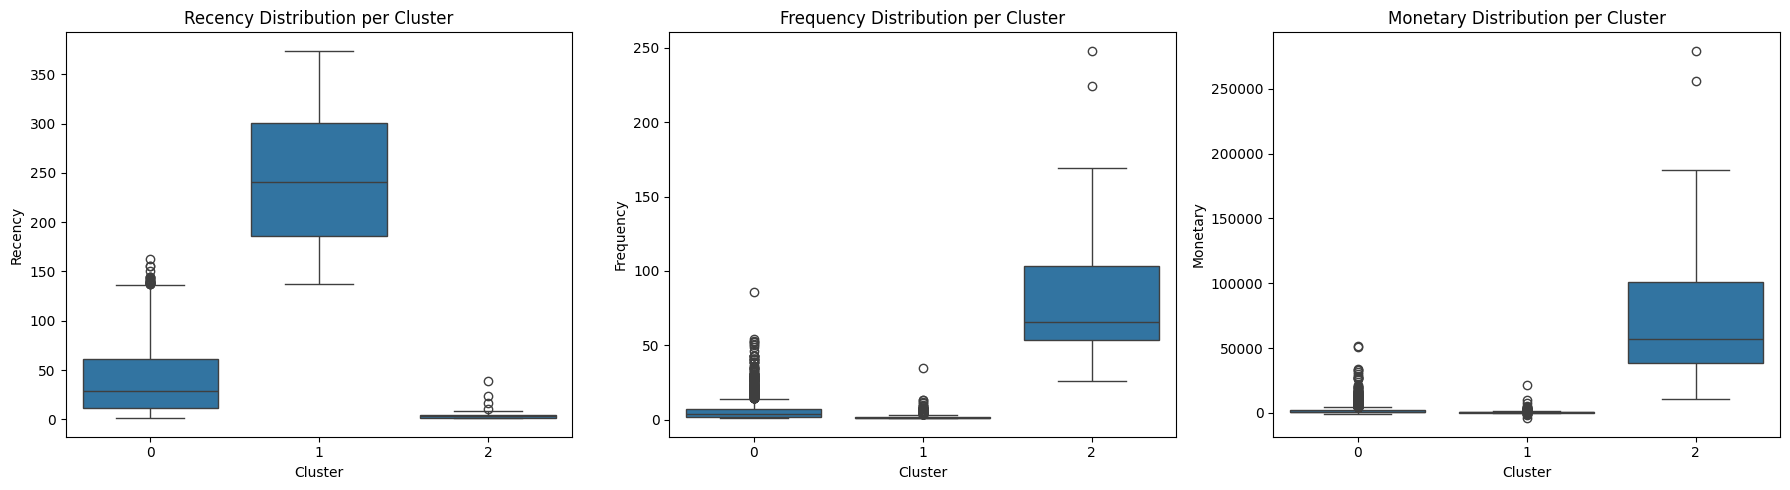

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a single row of boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Recency Distribution per Cluster
sns.boxplot(ax=axes[0], x='Cluster', y='Recency', data=rfm)
axes[0].set_title('Recency Distribution per Cluster')

# Frequency Distribution per Cluster
sns.boxplot(ax=axes[1], x='Cluster', y='Frequency', data=rfm)
axes[1].set_title('Frequency Distribution per Cluster')

# Monetary Distribution per Cluster
sns.boxplot(ax=axes[2], x='Cluster', y='Monetary', data=rfm)
axes[2].set_title('Monetary Distribution per Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

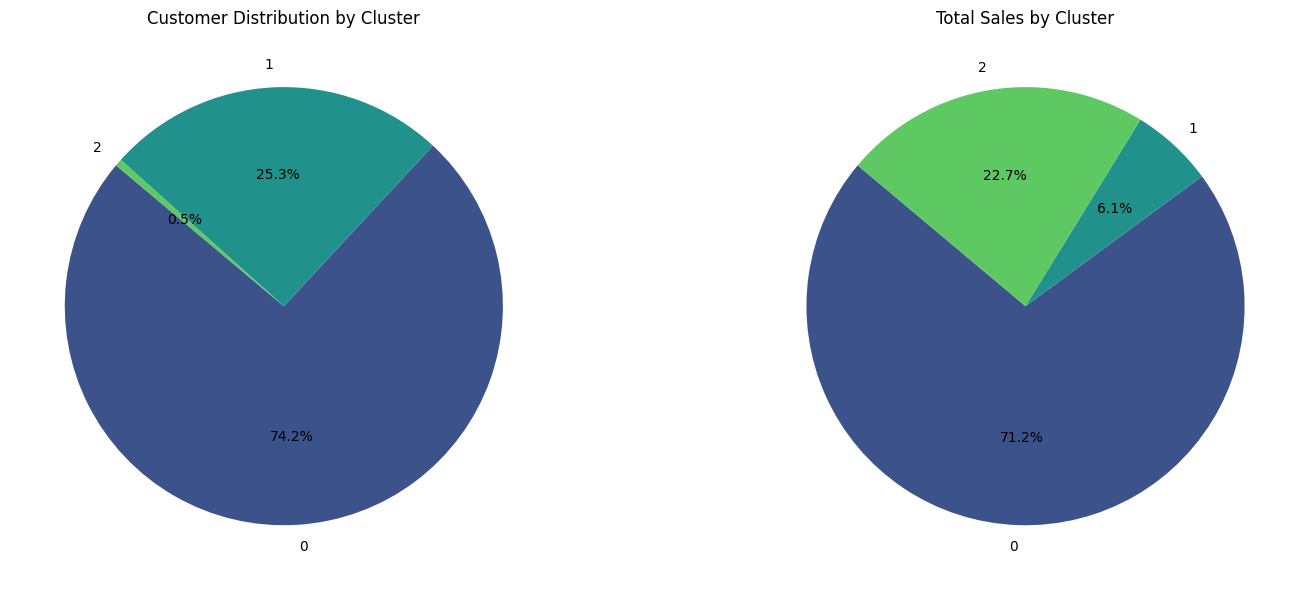

In [85]:
# Calculate the total sales (monetary value) for each cluster
cluster_sales = rfm.groupby('Cluster')['Monetary'].sum()

# Get the counts of customers in each cluster
cluster_counts = rfm['Cluster'].value_counts()

# Set up a figure with two pie charts: one for cluster sizes and one for total sales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart for customer distribution by cluster
axes[0].pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(cluster_counts)))
axes[0].set_title("Customer Distribution by Cluster")

# Pie chart for total sales by cluster
axes[1].pie(cluster_sales, labels=cluster_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(cluster_sales)))
axes[1].set_title("Total Sales by Cluster")

plt.tight_layout()
plt.show()

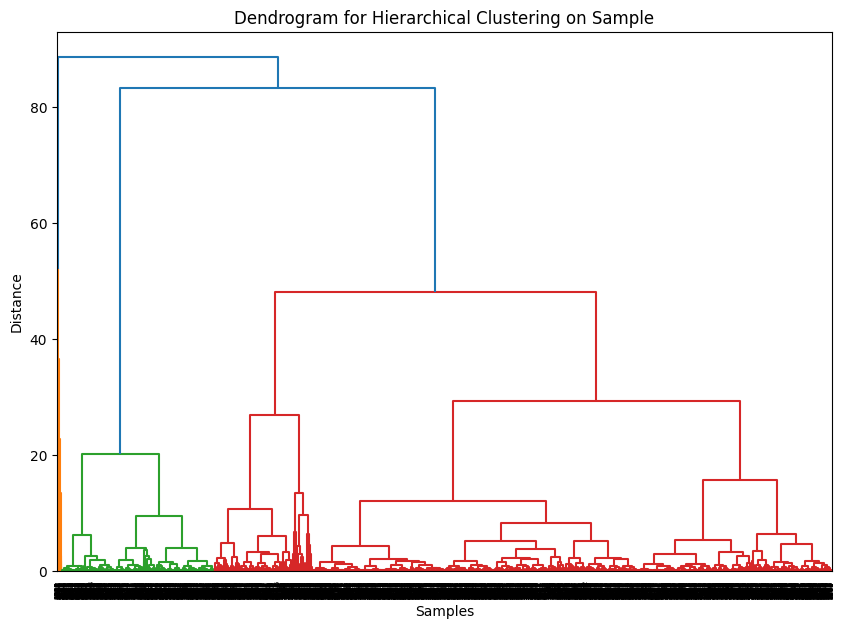

In [86]:
# Generate a dendrogram for hierarchical clustering
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering on Sample')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

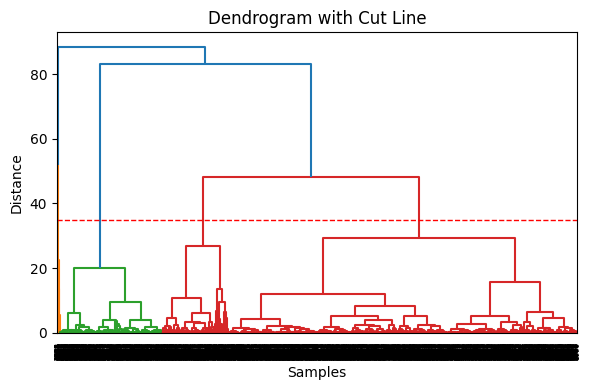

In [87]:
# Generate the dendrogram with a horizontal cut line
plt.figure(figsize=(6, 4))  # Smaller figure size for better legibility
dendrogram(linked)
plt.axhline(y=35, color='r', linestyle='--', linewidth=1)  # Adjusted line width for clarity
plt.title('Dendrogram with Cut Line', fontsize=12)  # Shortened title for simplicity
plt.xlabel('Samples', fontsize=10)
plt.ylabel('Distance', fontsize=10)
plt.tight_layout()  # Automatically adjust spacing for better visualization
plt.show()

In [88]:
# Apply Agglomerative Clustering to limit to 3 clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
rfm['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(scaled_features)

In [89]:
# Display the first few rows to verify the cluster assignments
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Hierarchical_Cluster']].head())

   CustomerID  Recency  Frequency  Monetary  Hierarchical_Cluster
0     12346.0      326          2      0.00                     2
1     12347.0        2          7   4310.00                     1
2     12348.0       75          4   1797.24                     1
3     12349.0       19          1   1757.55                     1
4     12350.0      310          1    334.40                     2


In [90]:
# Summarize the hierarchical clusters
hierarchical_summary = rfm.groupby('Hierarchical_Cluster').agg({
    'Recency': ['mean', 'std', 'min', 'max', 'median'],
    'Frequency': ['mean', 'std', 'min', 'max', 'median'],
    'Monetary': ['mean', 'std', 'min', 'max', 'median']
}).reset_index()

# Rename columns for clarity
hierarchical_summary.columns = ['Hierarchical_Cluster', 'Avg_Recency', 'Std_Recency', 'Min_Recency', 'Max_Recency', 'Median_Recency',
                                'Avg_Frequency', 'Std_Frequency', 'Min_Frequency', 'Max_Frequency', 'Median_Frequency',
                                'Avg_Monetary', 'Std_Monetary', 'Min_Monetary', 'Max_Monetary', 'Median_Monetary']

print("Hierarchical Clustering Summary Statistics:")
print(hierarchical_summary)

Hierarchical Clustering Summary Statistics:
   Hierarchical_Cluster  Avg_Recency  Std_Recency  Min_Recency  Max_Recency  \
0                     0     6.360000     8.712443            1           39   
1                     1    48.485788    45.897233            1          302   
2                     2   270.133102    57.472485          169          374   

   Median_Recency  Avg_Frequency  Std_Frequency  Min_Frequency  Max_Frequency  \
0             3.0      82.560000      58.381704             14            248   
1            32.0       5.346827       6.287462              1             63   
2           264.0       1.739583       1.437942              1             13   

   Median_Frequency  Avg_Monetary  Std_Monetary  Min_Monetary  Max_Monetary  \
0              66.0  78232.955600  70326.309744       7711.38     279489.02   
1               3.0   1709.832806   2845.152937      -4287.63      36351.42   
2               1.0    450.109098    962.086890      -1192.20      21535.90  

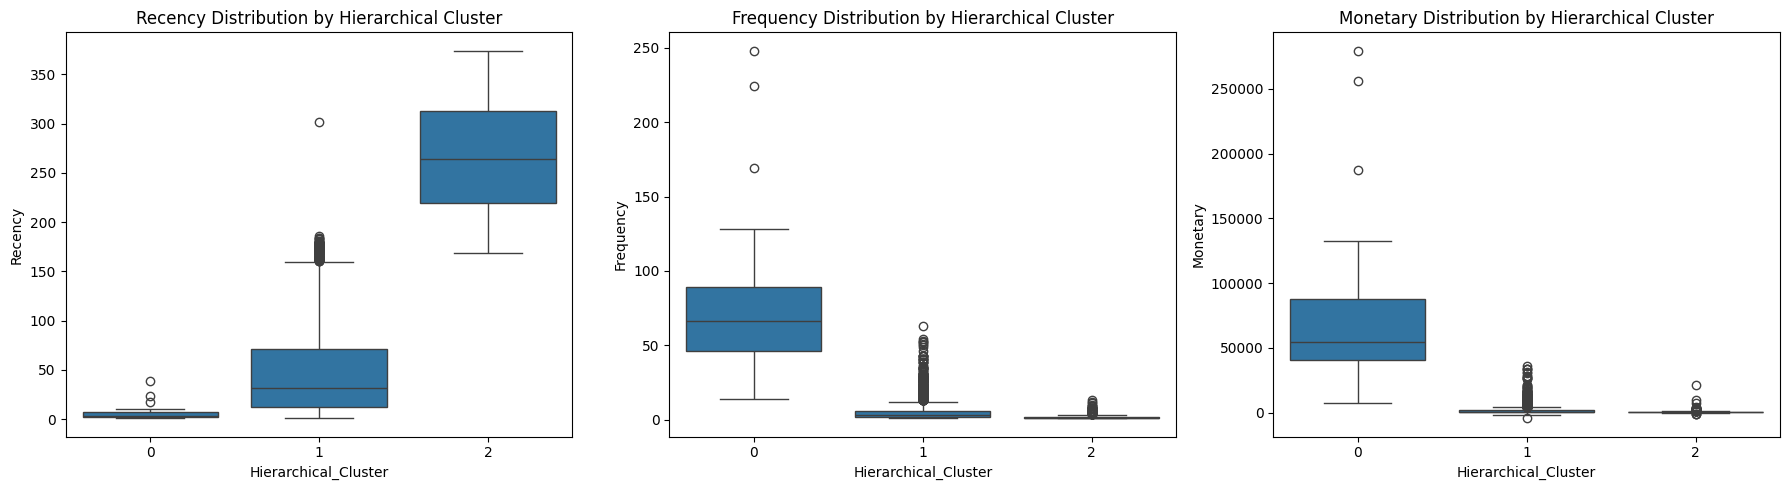

In [91]:
# Set up the figure size and layout for 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Recency distribution
sns.boxplot(x='Hierarchical_Cluster', y='Recency', data=rfm, ax=axes[0])
axes[0].set_title('Recency Distribution by Hierarchical Cluster')

# Plot Frequency distribution
sns.boxplot(x='Hierarchical_Cluster', y='Frequency', data=rfm, ax=axes[1])
axes[1].set_title('Frequency Distribution by Hierarchical Cluster')

# Plot Monetary distribution
sns.boxplot(x='Hierarchical_Cluster', y='Monetary', data=rfm, ax=axes[2])
axes[2].set_title('Monetary Distribution by Hierarchical Cluster')

plt.tight_layout()
plt.show()